In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from sklearn import model_selection, linear_model, metrics
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
train_csv=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
train_labels=train_csv['SalePrice']

# Find features with many NaNs values

In [ ]:
nan_count=train_csv.isnull().sum(axis = 0)

#remove columns without NaNs
nan_count=nan_count[nan_count > 0]
nan_count.sort_values()

I won't use 'Fence', 'Alley', 'MiscFeature', 'PoolQC', 'FireplaceQu' features

# Numeric features analysis

In [ ]:
numeric_columns=['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars']
numeric_data=train_csv[numeric_columns]
numeric_data=numeric_data.fillna(0)

## Plots of SalePrice on numeric feature values

In [ ]:
fig, axs = plt.subplots (6,5)
fig.set_size_inches(25,25)

fig.suptitle('numeric features')
for i,feature in enumerate(numeric_data.columns):
    axs[i//5, i%5].scatter(numeric_data[feature], train_csv['SalePrice'], color='blue')
    axs[i//5, i%5].set_title(feature)
 

In [ ]:
corr_labels=numeric_data.corrwith(train_labels)
corr_labels.sort_values()

### The best correlated features

In [ ]:
numeric_columns=['LotArea', 'OpenPorchSF', '2ndFlrSF', 'WoodDeckSF', 'BsmtFinSF1', 'Fireplaces', 'MasVnrArea', 'TotRmsAbvGrd', 'FullBath', '1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'GarageCars', 'GrLivArea']
numeric_data=numeric_data[numeric_columns]

## Searching for collinear features

In [ ]:
corr_matrix=numeric_data.corr(method ='pearson')
corr_matrix

In [ ]:
for label_c, content in corr_matrix.items():
    for label_r, score in content.items():
        if score>0.6 and label_r>label_c:
            print(label_r, label_c, score)

In [ ]:
numeric_data.drop(['1stFlrSF','2ndFlrSF', 'FullBath', 'GarageCars','TotRmsAbvGrd'], axis = 1, inplace = True)

In [ ]:
numeric_data.skew()

In [ ]:
numeric_data.kurt()

# Rank features analysis

In [ ]:
rank_columns = ['OverallQual', 'OverallCond','ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond','BsmtFinType1', 'BsmtFinType2','Functional']
rank_data=train_csv[rank_columns]

In [ ]:
rank_data=rank_data.replace(['Ex', 'Gd', 'TA', 'Fa', 'Po'],[5, 4, 3, 2, 1])
rank_data=rank_data.replace(['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf'],[6, 5, 4, 3, 2, 1])
rank_data=rank_data.replace(['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2','Sev','Sal'],[8, 7, 6, 5, 4, 3, 2, 1])

In [ ]:
rank_data=rank_data.fillna(0)

In [ ]:
fig, axs = plt.subplots (5,3)
fig.set_size_inches(25,25)

fig.suptitle('rank features')
for i,feature in enumerate(rank_data.columns):
    axs[i//3, i%3].scatter(rank_data[feature], train_csv['SalePrice'], color='blue')
    axs[i//3, i%3].set_title(feature)

In [ ]:
corr_labels=rank_data.corrwith(train_labels)
corr_labels.sort_values()

## The best correlated features:

In [ ]:
rank_columns=['HeatingQC', 'BsmtQual', 'KitchenQual', 'ExterQual', 'OverallQual']
rank_data=rank_data[rank_columns]

In [ ]:
corr_matrix=rank_data.corr(method ='pearson')
corr_matrix

In [ ]:
for label_c, content in corr_matrix.items():
    for label_r, score in content.items():
        if score>0.7 and label_r>label_c:
            print(label_r, label_c, score)

In [ ]:
rank_data.drop(['ExterQual'], axis = 1, inplace = True)

# Categorical features analysis

In [ ]:
categorical_columns = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType', 'SaleCondition','BsmtExposure']
categorical_data=train_csv[categorical_columns]
categorical_data=categorical_data.fillna('None')

## Display count plots to find skewed features

In [ ]:
fig = plt.figure(figsize = (20,30))

for i,feature in enumerate(categorical_data.columns):
    
    ax1 = fig.add_subplot(15,3,i+1)
    sns.countplot(x=feature, data=categorical_data, ax=ax1)


## Remove skewed variables

In [ ]:
categorical_columns=['MSSubClass', 'Exterior2nd', 'LotConfig', 'Neighborhood', 'MasVnrType', 'LandSlope', 'LotShape', 'Foundation', 'GarageType', 'GarageFinish', 'Exterior1st', 'HouseStyle']
categorical_data=categorical_data[categorical_columns]

In [ ]:
categorical_data_copy=categorical_data.copy()
categorical_data_copy['SalePrice']=train_csv['SalePrice']

fig = plt.figure(figsize = (20,30))

for i,feature in enumerate(categorical_data.columns):
    
    ax1 = fig.add_subplot(9,3,i+1)
    sns.violinplot(x=feature, y="SalePrice", split=True, data=categorical_data_copy, ax=ax1)

# Trying out different sets of features

In [ ]:
attempt=5

# choose some good features for each class
if attempt==1:
    numeric_columns=['BsmtFinSF1', 'Fireplaces', 'TotalBsmtSF', 'GarageArea', 'GrLivArea']
    rank_columns=['HeatingQC', 'BsmtQual', 'KitchenQual', 'OverallQual']
    categorical_columns=[ 'MSSubClass','Neighborhood','HouseStyle','Exterior1st','Exterior2nd','GarageType','GarageFinish']
    
# add more numeric features
if attempt==2:
    numeric_columns=['LotArea', 'OpenPorchSF', 'WoodDeckSF', 'BsmtFinSF1', 'Fireplaces', 'MasVnrArea', 'TotalBsmtSF', 'GarageArea', 'GrLivArea']
    rank_columns=['HeatingQC', 'BsmtQual', 'KitchenQual', 'OverallQual']
    categorical_columns=[ 'MSSubClass','Neighborhood','HouseStyle','Exterior1st','Exterior2nd','GarageType','GarageFinish']
        
# add more categorical features
if attempt==3:
    numeric_columns=['LotArea', 'OpenPorchSF', 'WoodDeckSF', 'BsmtFinSF1', 'Fireplaces', 'MasVnrArea', 'TotalBsmtSF', 'GarageArea', 'GrLivArea']
    rank_columns=['HeatingQC', 'BsmtQual', 'KitchenQual', 'OverallQual']
    categorical_columns=['MSSubClass', 'Exterior2nd', 'LotConfig', 'Neighborhood', 'MasVnrType', 'LandSlope', 'LotShape', 'Foundation', 'GarageType', 'GarageFinish', 'Exterior1st', 'HouseStyle']

# remove OpenPorchSF and Fireplaces from numeric features
if attempt==4:    
    numeric_columns=['LotArea', 'WoodDeckSF', 'BsmtFinSF1', 'MasVnrArea', 'TotalBsmtSF', 'GarageArea', 'GrLivArea']
    rank_columns=['HeatingQC', 'BsmtQual', 'KitchenQual', 'OverallQual']
    categorical_columns=['MSSubClass', 'Exterior2nd', 'LotConfig', 'Neighborhood', 'MasVnrType', 'LandSlope', 'LotShape', 'Foundation', 'GarageType', 'GarageFinish', 'Exterior1st', 'HouseStyle']
    
# use rank features as categorical
if attempt==5:
    numeric_columns=['LotArea', 'WoodDeckSF', 'BsmtFinSF1', 'MasVnrArea', 'TotalBsmtSF', 'GarageArea', 'GrLivArea']
    rank_columns=[]
    categorical_columns=['MSSubClass', 'Exterior2nd', 'LotConfig', 'Neighborhood', 'MasVnrType', 'LandSlope', 'LotShape', 'Foundation', 'GarageType', 'GarageFinish', 'Exterior1st', 'HouseStyle','HeatingQC', 'BsmtQual', 'KitchenQual', 'OverallQual']

In [ ]:
len(numeric_columns)+len(rank_columns)+len(categorical_columns)

# Remove outliers from train set

In [ ]:
def remove_outliers(data):
    if 'BsmtFinSF1' in data.columns:
        data=data[(data['BsmtFinSF1'] < 3000) ]
        
    if 'TotalBsmtSF' in data.columns:
        data=data[(data['TotalBsmtSF'] < 3500) ]
        
    if 'GarageArea' in data.columns:
        data=data[(data['GarageArea'] < 1300) ]
        
    if 'GrLivArea' in data.columns:
        data=data[(data['GrLivArea'] < 5000) ]
        
    if 'LotArea' in data.columns:
        data=data[(data['LotArea'] < 100000) ]
        
    if 'WoodDeckSF' in data.columns:
        data=data[(data['WoodDeckSF'] < 750) ]
        
    if 'OpenPorchSF' in data.columns:
        data=data[(data['OpenPorchSF'] < 500) ]

In [ ]:
remove_outliers(train_csv)

# Dictionary for all possible categorical values

In [ ]:
cat_values={'MSSubClass' : {'1SN', '1SO', '1SWF', '112SU', '112SF', '2SN', '2SO', '212S', 'SM', 'SF', 'D', '1SP', '12SP', '2SP', 'PM', '2FC'}, #replace numbers with strings
           'Exterior2nd': {'AsbShng', 'AsphShn', 'Brk Cmn', 'BrkFace', 'CBlock', 'CmentBd', 'HdBoard', 'ImStucc', 'MetalSd', 'None', 'Plywood', 'PreCast', 'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'Wd Shng','Other'},
           'LotConfig' : {'Inside','Corner','CulDSac','FR2','FR3'},
            'Neighborhood' : {'Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NoRidge', 'NPkVill', 'NridgHt', 'NWAmes', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker'},
            'MasVnrType' : {'BrkCmn', 'BrkFace', 'CBlock', 'None', 'Stone'},
            'LandSlope' : {'Gtl', 'Mod', 'Sev'},
            'LotShape' : {'Reg', 'IR1', 'IR2', 'IR3'},
            'Foundation' : {'BrkTil', 'CBlock', 'PConc', 'Slab', 'Stone', 'Wood'},
            'GarageType' : {'2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd', 'None'},
            'GarageFinish' : {'Fin', 'RFn', 'Unf', 'None'},
            'Exterior1st' : {'AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 'HdBoard', 'ImStucc', 'MetalSd', 'None', 'Plywood', 'PreCast', 'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing', 'Other'},
            'HouseStyle' : {'1Story', '1.5Fin', '1.5Unf', '2Story', '2.5Fin', '2.5Unf', 'SFoyer', 'SLvl'},
            'HeatingQC': {'Ex', 'Gd', 'TA', 'Fa', 'Po', 'None'},
            'BsmtQual': {'Ex', 'Gd', 'TA', 'Fa', 'Po', 'None'},
            'KitchenQual': {'Ex', 'Gd', 'TA', 'Fa', 'Po', 'None'},
            'OverallQual': {'Ex', 'Gd', 'TA', 'Fa', 'Po', 'None'}
           }

In [ ]:
categorical_dummy_columns=[]
for c in cat_values:
    for v in cat_values[c]:
        categorical_dummy_columns.append(c+'_'+v)

In [ ]:
def process_dataset(data):
    
    numeric_data=data[numeric_columns]
    rank_data=data[rank_columns]
    categorical_data=data[categorical_columns]
    
    #process numeric features
    numeric_data=numeric_data.fillna(0)
    
    #process rank features
    rank_data=rank_data.fillna(0)
    rank_data.replace(['Ex', 'Gd', 'TA', 'Fa', 'Po'],[5, 4, 3, 2, 1], inplace=True)

    #normalize all numeric and rank data
    numeric_n_rank_data=np.hstack((numeric_data,rank_data))
    scaler=StandardScaler()
    scaler.fit(numeric_n_rank_data,train_labels)
    numeric_data_scaled=scaler.transform(numeric_n_rank_data)  
    
    #process categorical features
    categorical_data=categorical_data.fillna('None')
    
    if 'MSSubClass' in categorical_data.columns:
        categorical_data.MSSubClass.replace([20,  30,  40,  45,  50,  60,  70,  75,  80,  85,  90, 120, 150, 160, 180, 190],['1SN', '1SO', '1SWF', '112SU', '112SF', '2SN', '2SO', '212S', 'SM', 'SF', 'D', '1SP', '12SP', '2SP', 'PM', '2FC'],inplace=True)

    categorical_data = pd.get_dummies(categorical_data)
    
    #add absent value columns
    absent_columns=set(categorical_dummy_columns)-set(categorical_data.columns)

    for c in absent_columns:
        categorical_data[c]=0
    
    categorical_data = categorical_data.reindex(sorted(categorical_data.columns), axis=1)

    X_data=np.hstack((numeric_data_scaled,categorical_data))
    return X_data

# Fit SGDRegressor and predict test results

In [ ]:
def linear_regression():
    Y_train=train_csv['SalePrice']
    Y_train = np.log1p(Y_train)
    X_train=process_dataset(train_csv)
    regressor=linear_model.SGDRegressor()
    
    # train SGDRegressor
    regressor.fit(X_train,Y_train)
    
    #perform cross-validation
    scorer=metrics.make_scorer(metrics.mean_squared_error)
    linear_scoring = model_selection.cross_val_score(regressor, X_train, Y_train, scoring=scorer, cv = 5)
    print('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))
    
    #predict results for train set
    X_test=process_dataset(test_csv)
    ridge_predictions = regressor.predict(X_test)
    ridge_predictions_restored=np.expm1(ridge_predictions)
    
    return ridge_predictions_restored

In [ ]:
test_csv=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [ ]:
ridge_predictions_restored=linear_regression()

In [ ]:
my_submission = pd.DataFrame({'Id': test_csv.Id, 'SalePrice': ridge_predictions_restored})
my_submission.to_csv('submission.csv', index=False)

# Plot of metrics on local cross-validation and leaderboard

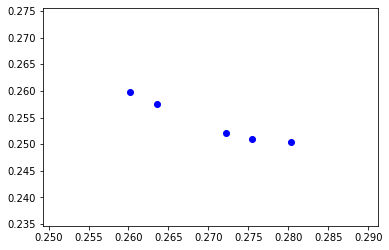

In [3]:
x_mean=np.sqrt([0.06767481960672328, 0.06943615429341633, 0.07407572398351811, 0.07586403466423826, 0.0785751690613064])
y_score=[0.25985, 0.25749, 0.25210, 0.25106, 0.25032]
plt.scatter(x_mean, y_score, color='blue')

# The arithmetic mean of several regressions

In [ ]:
rank_columns=[]

numeric_columns=['LotArea', 'WoodDeckSF', 'GrLivArea']
categorical_columns=['MSSubClass', 'Exterior2nd', 'LotConfig', 'Neighborhood', 'OverallQual']
predictions1 = linear_regression()

numeric_columns=['BsmtFinSF1', 'GarageArea']
categorical_columns=['MasVnrType', 'LandSlope', 'LotShape', 'Foundation', 'KitchenQual']
predictions2 = linear_regression()

numeric_columns=['MasVnrArea', 'TotalBsmtSF']
categorical_columns=[ 'GarageType', 'GarageFinish', 'Exterior1st', 'HouseStyle', 'HeatingQC', 'BsmtQual']
predictions3 = linear_regression()

predictions = np.mean([predictions1, predictions2, predictions3],axis=0)
my_submission = pd.DataFrame({'Id': test_csv.Id, 'SalePrice': predictions})
my_submission.to_csv('submission_mean.csv', index=False)

#public score = 0.19810